In [5]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import numpy as np
import tensorflow as tf
import cv2


In [6]:
path_dataset= r"./dataset-leaf"
dir = path_dataset
datadir = path_dataset

In [7]:
Categories = []
# Duyệt qua danh sách các thư mục (lớp) trong datadir (đường dẫn đến dữ liệu hình ảnh), và thêm tên của mỗi thư mục vào danh sách Categories.
for cat in os.listdir(datadir):
    Categories.append(cat)
Categories

['acer_campestre',
 'acer_ginnala',
 'acer_pensylvanicum',
 'acer_saccharinum',
 'aesculus_glabra',
 'amelanchier_arborea',
 'betula_alleghaniensis',
 'celtis_tenuifolia',
 'ulmus_glabra']

In [8]:
dict_cat={}
count=0
for cat in Categories:

  dict_cat[str(count)]=str(cat)
  count+=1
print(dict_cat)

{'0': 'acer_campestre', '1': 'acer_ginnala', '2': 'acer_pensylvanicum', '3': 'acer_saccharinum', '4': 'aesculus_glabra', '5': 'amelanchier_arborea', '6': 'betula_alleghaniensis', '7': 'celtis_tenuifolia', '8': 'ulmus_glabra'}


In [9]:
dict_cat.get('1')

'acer_ginnala'

In [10]:
data_file_hsv=np.load("./hsv.npy",allow_pickle=True)
data_file_rgb=np.load("./rgb.npy",allow_pickle=True)
data_file_concat_hog_hsv = np.load(
    "./concat_hsv_hog.npy", allow_pickle=True)
# data_file_concat_hog_rgb=np.load("/content/drive/MyDrive/HK2_N4/DPT/concat_hog_rgb.npy",allow_pickle=True)
# data_file_concat_hog_hsv_rgb = np.load("/content/drive/MyDrive/HK2_N4/DPT/data_file_concat_hog_hsv_rgb.npy",allow_pickle=True)

In [11]:
# data_file_concat_hog_hsv[0][1] = np.concatenate((data_file_concat_hog_hsv[0][1] ,data_file_concat_hog_rgb[0][1]))

In [12]:
# len(data_file_concat_hog_hsv_rgb[0][1])

In [13]:
len(data_file_concat_hog_hsv[0][1])

134244

# INPUT ẢNH TEST VÀ CHUYỂN SANG HỆ RGB

In [86]:
leaf_data = []
# path_img_test = './data-test/test_betula_alleghaniensis-Photoroom.png'
# path_img_test = './data-test/test_acer_saccharinum-Photoroom.png'
# path_img_test = './data-test/test_acer_pensylvanicum-Photoroom.png'
path_img_test = './data-test/test_image2.png'
img_array = cv2.imread(path_img_test, cv2.COLOR_BGR2RGB)
img_size = (496, 496)
img_array = cv2.resize(img_array, img_size) #continue

leaf_data.append([1000,img_array])

In [87]:
leaf_data[0]

[1000,
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8)]

# HÀM TRÍCH ĐẶC TRƯNG MÀU

In [88]:
def rgb_to_hsv(pixel):
    r , g, b = pixel
    r , g ,b = b / 255.0, g / 255.0, r / 255.0

    v = max(r,g,b)
    delta = v - min(r,g,b)

    if delta == 0:
        h = 0
        s = 0
    else:
        s = delta / v
        if r == v:
            h = (g - b) / delta
        elif g == v:
            h = 2 + (b - r) / delta
        else:
            h = 4 + (r - g) / delta
        h = (h / 6) % 1.0

    return [int(h*180), int(s*255), int(v*255)]

def covert_image_rgb_to_hsv(img):
  hsv_image=[]
  for i in img:
    hsv_image2=[]
    for j in i:
      new_color=rgb_to_hsv(j)
      hsv_image2.append((new_color))
    hsv_image.append(hsv_image2)
  hsv_image=np.array(hsv_image)
  return hsv_image

def my_calcHist(image, channels, histSize, ranges):
    # Khởi tạo histogram với tất cả giá trị bằng 0
    hist = np.zeros(histSize, dtype=np.int64)
    # Lặp qua tất cả các pixel trong ảnh
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            # Lấy giá trị của kênh màu được chỉ định
            bin_vals = [image[i, j, c] for c in channels]
            # Tính chỉ số của bin
            bin_idxs = [(bin_vals[c] - ranges[c][0]) * histSize[c] // (ranges[c][1] - ranges[c][0]) for c in range(len(channels))]
            # Tăng giá trị của bin tương ứng lên 1
            hist[tuple(bin_idxs)] += 1
    return hist

# TRÍCH XUẤT RGB

In [89]:
from tqdm import tqdm
data_RGB_test =[]
img = leaf_data[0][1]
bins = [8, 8,8]
ranges = [[0, 256], [0, 256], [0, 256]]
# img_hsv=covert_image_rgb_to_hsv(img)
hist_my = my_calcHist(img, [0, 1, 2], bins, ranges)
embedding = hist_my.flatten()
embedding[0]=0
data_RGB_test.append([leaf_data[0][0],embedding])

In [90]:
embedding

array([    0,    22,     0,     0,     0,     0,     0,     0,  1030,
        4048,    27,     0,     0,     0,     0,     0,     5, 26417,
        2240,    63,     0,     0,     0,     0,     0,     3,   337,
          41,     0,     0,     0,     0,     0,     0,     0,     0,
           2,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,    65,    10,     0,     0,     0,     0,     0,     0,
         467,   918,    37,     0,     0,     0,     0,     0,     0,
         540,   363,    62,     0,     0,     0,     0,     0,     0,
           5,   123,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

  # TRÍCH XUẤT HSV

In [91]:
data_HSV_test=[]
# Đọc ảnh và chuyển đổi sang không gian màu HSV
img = leaf_data[0][1]
bins = [8,12,3]
ranges = [[0, 180], [0, 256], [0, 256]]
img_hsv=covert_image_rgb_to_hsv(img)
hist_my = my_calcHist(img_hsv, [0, 1, 2], bins, ranges)
# print(hist_my.shape)
embedding = hist_my.flatten()
embedding[0]=0
data_HSV_test.append([leaf_data[0][0],embedding])


# TRÍCH XUẤT ĐẶC TRƯNG HÌNH HẠNG

In [92]:
from skimage import exposure
from skimage import feature
import cv2
def convert_image_rgb_to_gray(img_rgb, resize="no"):
  h, w, _ = img_rgb.shape
  # Create a new grayscale image with the same height and width as the RGB image
  img_gray = np.zeros((h, w), dtype=np.uint32)

  # Convert each pixel from RGB to grayscale using the formula Y = 0.299R + 0.587G + 0.114B
  for i in range(h):
      for j in range(w):
          r, g, b = img_rgb[i, j]
          gray_value = int(0.299*r + 0.587*g + 0.114*b)
          img_gray[i, j] = gray_value
  # print(gray_image.shape())
  if resize!="no":
     img_gray = cv2.resize(src=img_gray, dsize=(496, 496))
  return np.array(img_gray)
def hog_feature(gray_img):# default gray_image
  # 1. Khai báo các tham số
  (hog_feats, hogImage) = feature.hog(gray_img, orientations=9, pixels_per_cell=(8 , 8),
    cells_per_block=(2,2), transform_sqrt=True, block_norm="L2",
    visualize=True)
  return hog_feats

In [93]:
len(leaf_data)

1

# TRÍCH XUẤT HOG CỦA ẢNH TEST

In [94]:
data_HOG_test=[]
# Đọc ảnh và chuyển đổi sang không gian màu HSV

# img_hsv=covert_image_rgb_to_hsv(img)
# hist_my = my_calcHist(img_hsv, [0, 1, 2], bins, ranges)
# print(hist_my.shape)
img_gray=convert_image_rgb_to_gray(leaf_data[0][1])
embedding=hog_feature(img_gray)
embedding = embedding.flatten()
# embedding[0]=0
data_HOG_test.append([leaf_data[0][0],embedding])

In [95]:
data_HOG_test

[[1000, array([0., 0., 0., ..., 0., 0., 0.])]]

In [96]:
len(data_HOG_test[0][1])

133956

# TRÍCH XUẤT HOG VÀ HSV

In [97]:
array_concat_hog_hsv=[]
concat_in_value = np.concatenate((data_HSV_test[0][1], data_HOG_test[0][1]))
array_concat_hog_hsv.append([data_HOG_test[0][0], concat_in_value])

In [98]:
array_concat_hog_hsv

[[1000, array([0., 0., 0., ..., 0., 0., 0.])]]

In [99]:
len(array_concat_hog_hsv[0][1])

134244

# TRÍCH XUẤT HOG VÀ RGB

In [100]:
array_concat_hog_rgb=[]
concat_in_value=np.concatenate((data_RGB_test[0][1] ,data_HOG_test[0][1]))
array_concat_hog_rgb.append([data_HOG_test[0][0],concat_in_value])

In [101]:
len(array_concat_hog_rgb[0][1])

134468

In [102]:
data_file_concat_hog_hsv

array([[0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [0, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],
       [1, array([0., 0., 0., ..., 0., 0., 0.])],


# ĐẶT LẠI TÊN CHO DỄ SỬ DỤNG

In [103]:
data_test = array_concat_hog_hsv
data_pre = data_file_concat_hog_hsv

In [104]:
array_concat_hog_hsv

[[1000, array([0., 0., 0., ..., 0., 0., 0.])]]

In [105]:
len(data_test)

1

# HÀM ECULID TÍNH KHOẢNG CÁCH GIỮA CÁC VECTORS ĐẶC TRƯNG CỦA ẢNH

In [106]:
import math

def distance_euclidean(x, y):
    if len(x) != len(y):
        return None  # Invalid input
    squared_distance = 0
    for i in range(len(x)):
        squared_distance += (x[i] - y[i]) ** 2
    return squared_distance ** 0.5


In [107]:
data_test

[[1000, array([0., 0., 0., ..., 0., 0., 0.])]]

In [108]:
len(data_test[0][1])

134244

# DISTANCE CHỨA KHOẢNG CÁCH GIỮA CÁC CÁC VECTORS ĐẶC TRƯNG CỦA ẢNH
# MINEST LÀ KHOẢNG CÁCH NHỎ NHẤT CỦA IMG INPUT VÀ CÁC MẪU

In [109]:
result = []
count = 1
for i in range(0,len(data_file_concat_hog_hsv)):
  if count > 12:
    count = 1
  d = distance_euclidean(data_file_concat_hog_hsv[i][1],data_test[0][1])
  result.append([data_file_concat_hog_hsv[i][0], count, d])
  count += 1

In [110]:
result


[[0, 1, 21560.058033439025],
 [0, 2, 23243.747634605366],
 [0, 3, 27541.53379013796],
 [0, 4, 26388.96294604745],
 [0, 5, 27616.27625052655],
 [0, 6, 17629.261047089043],
 [0, 7, 18179.002170352014],
 [0, 8, 25190.923435750512],
 [0, 9, 9407.879674902724],
 [0, 10, 14653.428326701393],
 [0, 11, 18136.514837979143],
 [0, 12, 13678.019864039445],
 [1, 1, 14497.940782675036],
 [1, 2, 13771.063325213434],
 [1, 3, 10488.753315092294],
 [1, 4, 9369.303075195687],
 [1, 5, 9899.567250311839],
 [1, 6, 8017.972501848436],
 [1, 7, 11501.59407799734],
 [1, 8, 14921.751806094357],
 [1, 9, 15448.69551622445],
 [1, 10, 13316.384086264621],
 [1, 11, 6372.550450786353],
 [1, 12, 20114.13409642929],
 [2, 1, 15301.686977900486],
 [2, 2, 33067.48225144558],
 [2, 3, 9905.465836057901],
 [2, 4, 27362.989939392814],
 [2, 5, 11814.662969155914],
 [2, 6, 17119.3031555851],
 [2, 7, 22760.10769099263],
 [2, 8, 18094.3626327154],
 [2, 9, 16146.734130432396],
 [2, 10, 28555.75547965018],
 [2, 11, 28051.15789751246

In [111]:
sorted_result_data = sorted(result, key=lambda x: x[2])

In [112]:
sorted_result_data

[[4, 5, 5991.151060449211],
 [4, 2, 6241.292909054793],
 [1, 11, 6372.550450786353],
 [4, 9, 7067.888814567813],
 [1, 6, 8017.972501848436],
 [4, 10, 8861.915825243628],
 [4, 8, 9171.107943888646],
 [1, 4, 9369.303075195687],
 [4, 4, 9395.760644044256],
 [0, 9, 9407.879674902724],
 [1, 5, 9899.567250311839],
 [2, 3, 9905.465836057901],
 [4, 12, 9960.950182242947],
 [1, 3, 10488.753315092294],
 [4, 1, 10561.86308726033],
 [4, 6, 11346.262730190772],
 [4, 7, 11346.262730190772],
 [1, 7, 11501.59407799734],
 [2, 5, 11814.662969155914],
 [1, 10, 13316.384086264621],
 [0, 12, 13678.019864039445],
 [1, 2, 13771.063325213434],
 [1, 1, 14497.940782675036],
 [0, 10, 14653.428326701393],
 [1, 8, 14921.751806094357],
 [2, 1, 15301.686977900486],
 [4, 3, 15312.395932690031],
 [1, 9, 15448.69551622445],
 [8, 10, 15518.977538053407],
 [4, 11, 15861.478696928396],
 [2, 9, 16146.734130432396],
 [3, 5, 16250.307191897049],
 [2, 6, 17119.3031555851],
 [0, 6, 17629.261047089043],
 [2, 8, 18094.3626327154

In [113]:
distance = []
address = [0] * 5
minest1 = 10**9
minest2 = 10**9
minest3 = 10**9
x1,x2,x3 = 0,0,0
tmp = 0
x = 1
data_finding =[]


for i in data_pre:
  if x > 12:
    x = 1
  d = distance_euclidean(i[1],data_test[0][1])
  distance.append(d)

  # data = []
  # data.append([1,2,3])
  if d < minest1:
    x3 = x2
    x2 = x1
    x1 = x
    minest3 = minest2
    minest2 = minest1
    minest1 = d
  elif d < minest2:
    x3 = x2
    x2 = x
    minest3 = minest2
    minest2 = d
  elif d < minest3:
    x3 = x
    minest3 = d
  x += 1


In [114]:
minest1,minest2,minest3

(5991.151060449211, 6241.292909054793, 6372.550450786353)

In [115]:
minest1

5991.151060449211

In [116]:
x1,x2,x3

(5, 2, 11)

In [117]:
distance

[21560.058033439025,
 23243.747634605366,
 27541.53379013796,
 26388.96294604745,
 27616.27625052655,
 17629.261047089043,
 18179.002170352014,
 25190.923435750512,
 9407.879674902724,
 14653.428326701393,
 18136.514837979143,
 13678.019864039445,
 14497.940782675036,
 13771.063325213434,
 10488.753315092294,
 9369.303075195687,
 9899.567250311839,
 8017.972501848436,
 11501.59407799734,
 14921.751806094357,
 15448.69551622445,
 13316.384086264621,
 6372.550450786353,
 20114.13409642929,
 15301.686977900486,
 33067.48225144558,
 9905.465836057901,
 27362.989939392814,
 11814.662969155914,
 17119.3031555851,
 22760.10769099263,
 18094.3626327154,
 16146.734130432396,
 28555.75547965018,
 28051.15789751246,
 18682.964555115374,
 18808.021284222898,
 23190.58887956706,
 22409.54973007477,
 22328.95515019133,
 16250.307191897049,
 24863.581886846434,
 19337.48133703787,
 25386.236549896297,
 23134.781172614134,
 22085.620001282092,
 20993.87580674565,
 23675.24964344445,
 10561.86308726033

In [118]:
print(address)

[0, 0, 0, 0, 0]


In [119]:
path_dataset

'./dataset-leaf'

In [120]:
print(result[0][0])

0


# OUTPUT 3 ẢNH GẦN GIỐNG NHẤT

./dataset-leaf/aesculus_glabra/12991998707449-Photoroom.png
./dataset-leaf/aesculus_glabra/12991998621638-Photoroom.png
./dataset-leaf/acer_ginnala/13291762518977-Photoroom.png


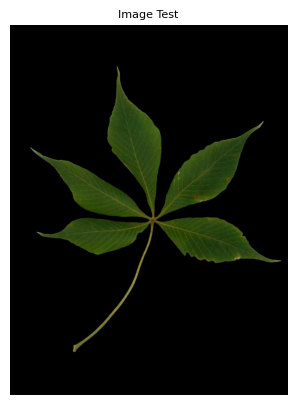

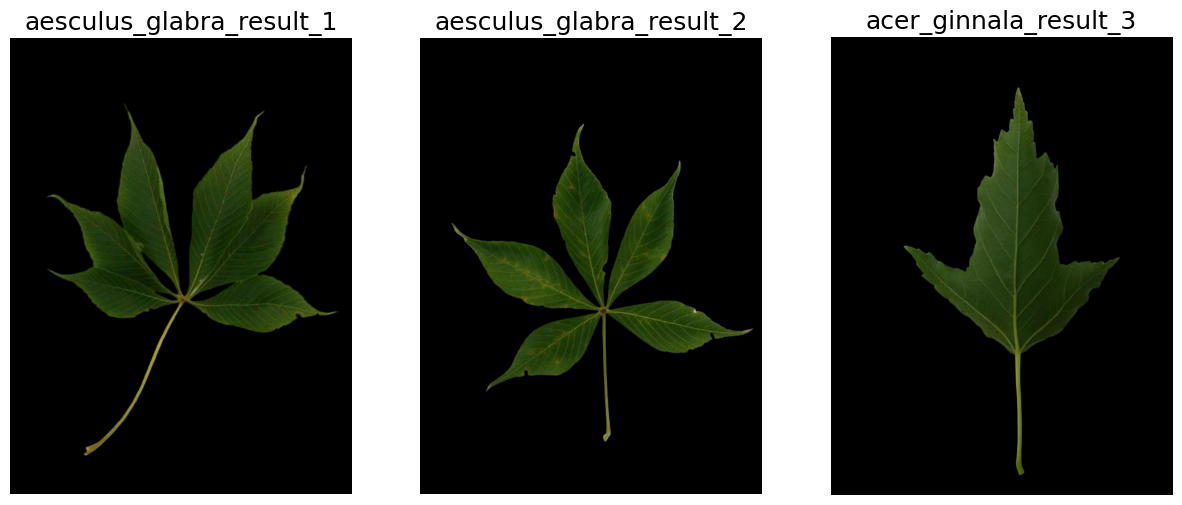

In [121]:
img = cv2.imread(path_img_test)
# Chuyển đổi hình ảnh từ BGR sang RGB (vì OpenCV đọc hình ảnh trong định dạng BGR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# # Hiển thị hình ảnh lên ô hình ảnh thứ i trong lưới.
# # Đặt tiêu đề cho hình ảnh là nhãn của lớp hình ảnh đã chọn, với cỡ chữ là 8.
plt.title('Image Test', fontsize=8)
#  Tắt trục đồ thị để loại bỏ các dấu nhắc nhở trục trong hình ảnh.
plt.axis('off')
plt.imshow(img)





W = 1
H = 3

# Tạo một đối tượng lưới hình ảnh với kích thước là W hàng và H cột
# với kích thước của lưới là (17,17) inches, và gán cho biến fig và axes.
fig, axes = plt.subplots(W, H, figsize=(15, 15))

# Chuyển đổi đối tượng lưới hình ảnh từ dạng hai chiều sang một chiều duy nhất để dễ dàng truy cập và xử lý.
axes = axes.ravel()
# Vòng lặp để duyệt qua từng phần tử trong lưới hình ảnh

for i in range(0, W * H):
    # Đọc hình ảnh từ đường dẫn đầy đủ của hình ảnh đã chọn bằng OpenCV
    # print(dict_cat.get(str(result[i][0])))
    class_dir = path_dataset +'/' + dict_cat.get(str(sorted_result_data[i][0]))
    # print(result[i][0])
    file_name = os.listdir(class_dir)
    path_img = class_dir +'/' + file_name[sorted_result_data[i][1]-1]
    # print(file_name)
    # print(path_img)
    # print(os.path.join(path_img,str(nearest_img[i][2]) + '.png'))
    # print((files[nearest_img[i][2]-1]))
    print(path_img)
    img = cv2.imread(path_img)
    # Chuyển đổi hình ảnh từ BGR sang RGB (vì OpenCV đọc hình ảnh trong định dạng BGR)

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Hiển thị hình ảnh lên ô hình ảnh thứ i trong lưới.
    axes[i].imshow(img)
    # Đặt tiêu đề cho hình ảnh là nhãn của lớp hình ảnh đã chọn, với cỡ chữ là 8.
    axes[i].set_title(dict_cat.get(str(sorted_result_data[i][0]))+"_result_" + str(i+1), fontsize=18)
    #  Tắt trục đồ thị để loại bỏ các dấu nhắc nhở trục trong hình ảnh.
    axes[i].axis('off')
    # break
plt.show()